In [1]:
%matplotlib inline
import matplotlib as mpl
mpl.style.use('/Users/nik/Dropbox/Notebooks/thesisrc.py')
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
import pandas as pd
import lvdatatools as lvdt

# SCF75

FM/FM device. Sputtered Co leads. Measured in dunker.

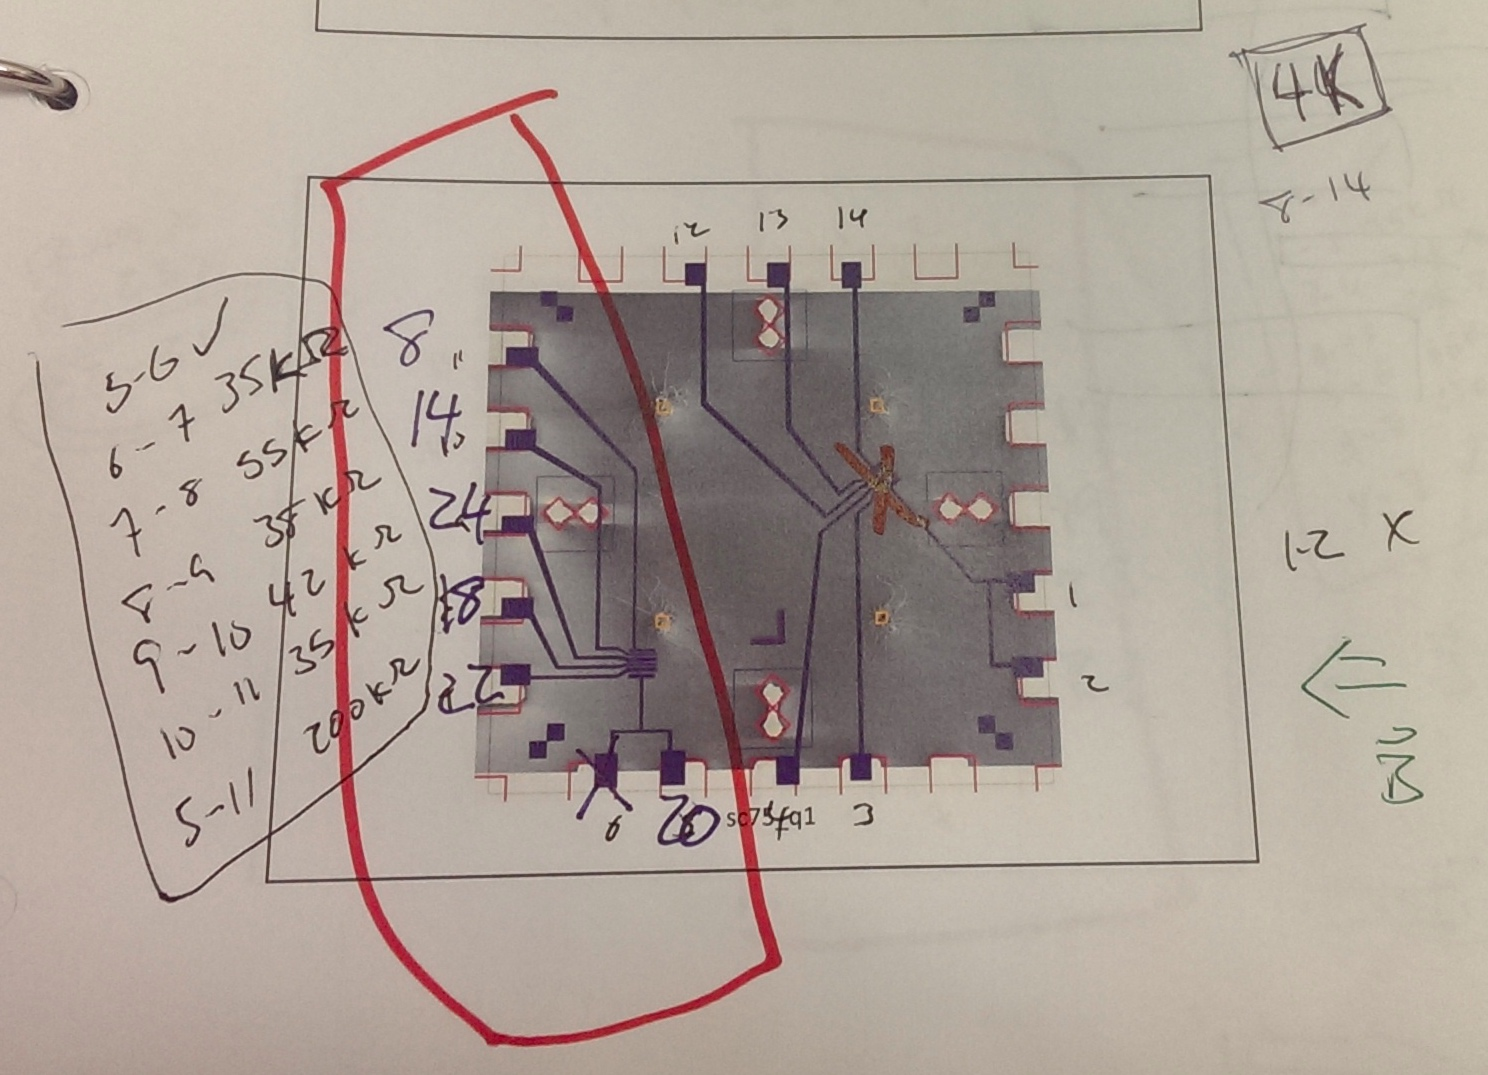

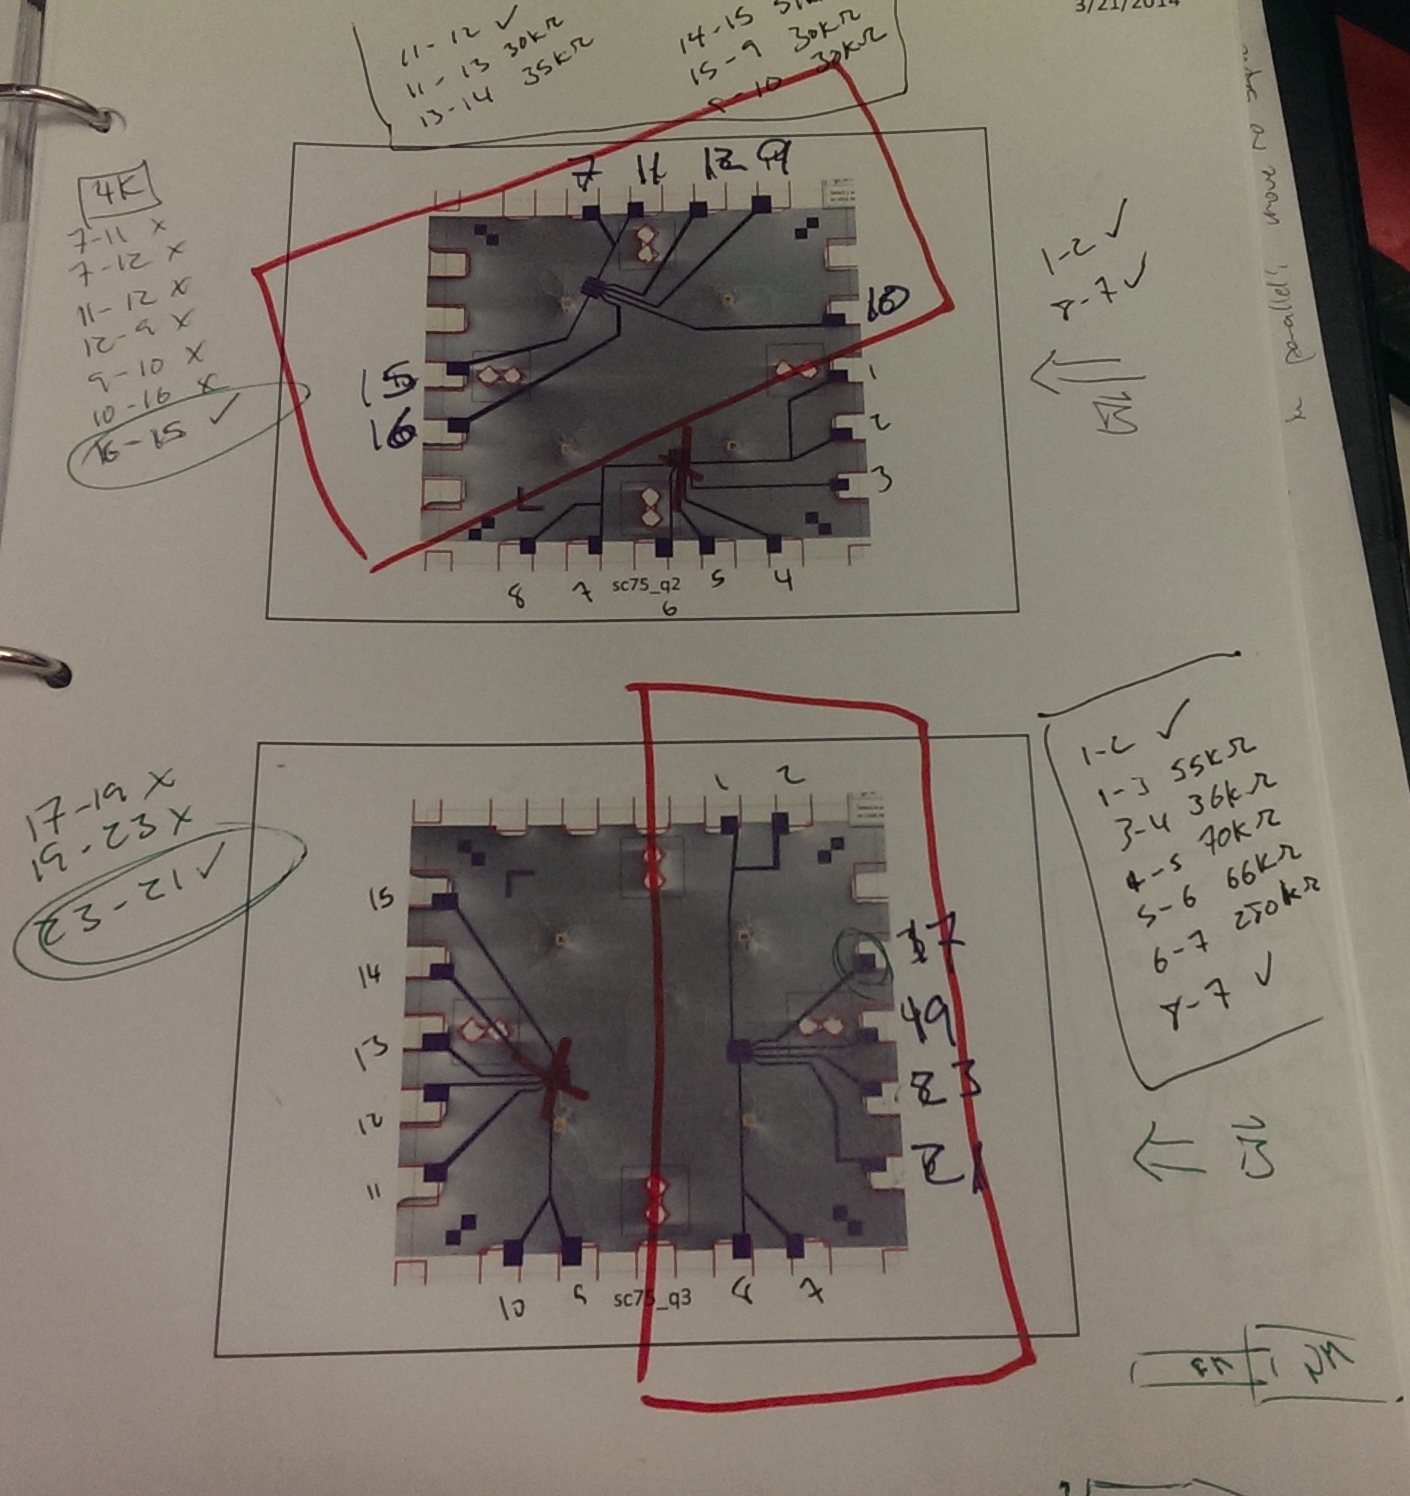

In [2]:
fig_dir = '/Volumes/JUPITER/Data/SCF75/figures/'
from IPython.display import display, Image

display(Image(os.path.join(fig_dir, 'scf75_1.jpg')))
display(Image(os.path.join(fig_dir, 'scf75_2.jpg')))

### Gate Sweep

There is also some cool down data I skipped.

In [3]:
data_dir = '/Volumes/JUPITER/Data/SCF75/4K/'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*gate-swp*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'gate-swp_15-16_13_a' 
1 -- 'gate-swp_15-16_13_b' 
2 -- 'gate-swp_15-16_13_c' 
3 -- 'gate-swp_15-16_13_d' 
4 -- 'gate-swp_15-16_13_e' 
5 -- 'gate-swp_15-16_13_f' 
6 -- 'gate-swp_15-16_13_g' 
7 -- 'gate-swp_21-23_13_a' 
8 -- 'gate-swp_9-12_13_a' 


/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_a.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_a.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_b.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_b.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_c.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_c.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_d.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_d.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_e.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_e.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_f.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_f.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_g.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_15-16_13_g.bin
/Volumes/JUPITER/Data/SCF75/4K/gate-swp_21-23_13_a.bin
trying --  /Volumes/JUPITER/Data/SCF75/4K/gate-swp_21-23_13_a.bin
/Volumes/JUPITER/Data/SCF75/4K/g

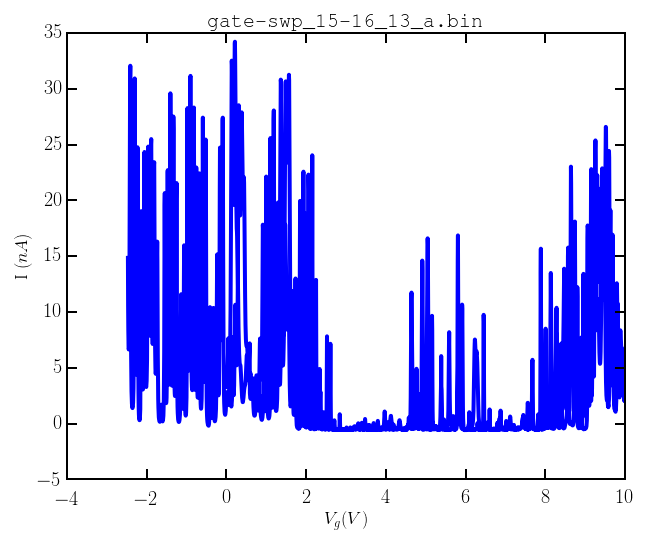

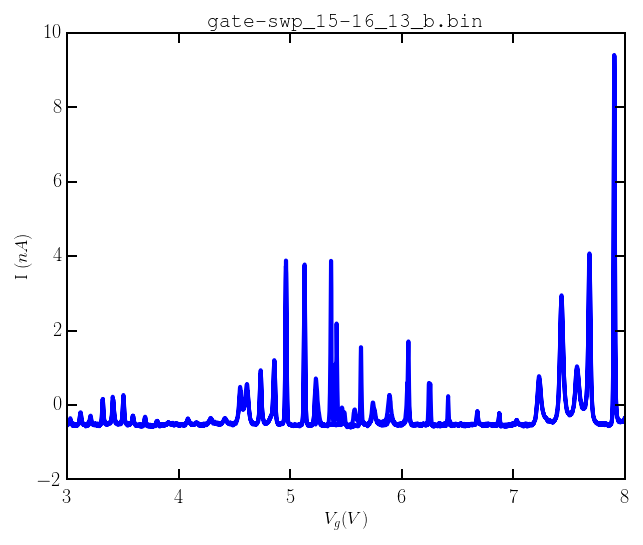

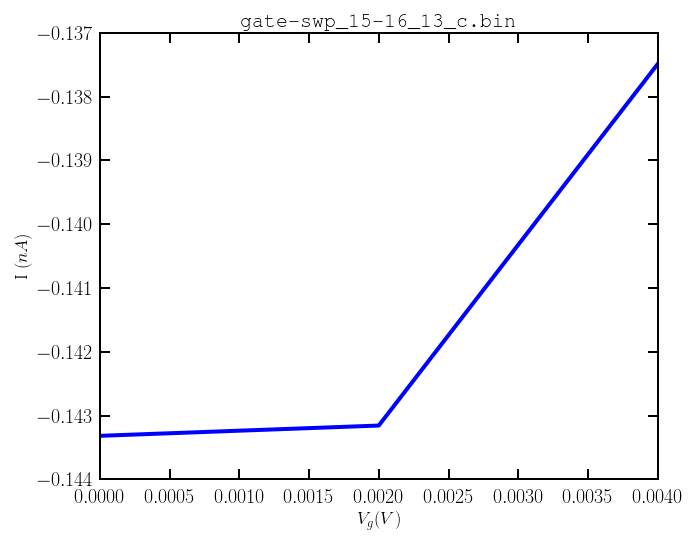

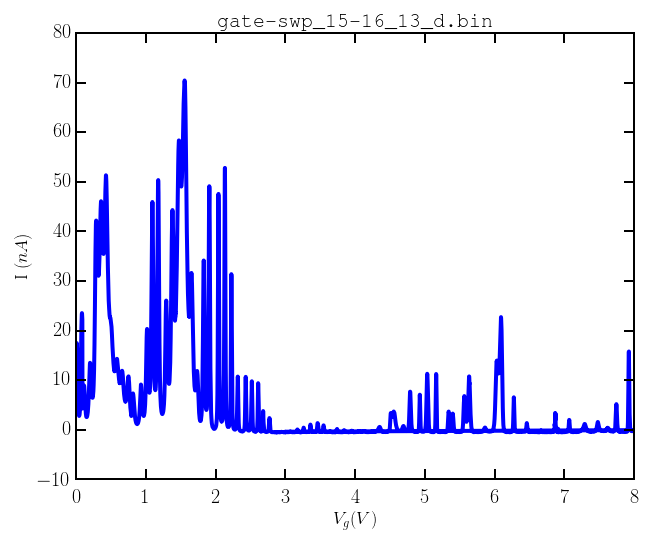

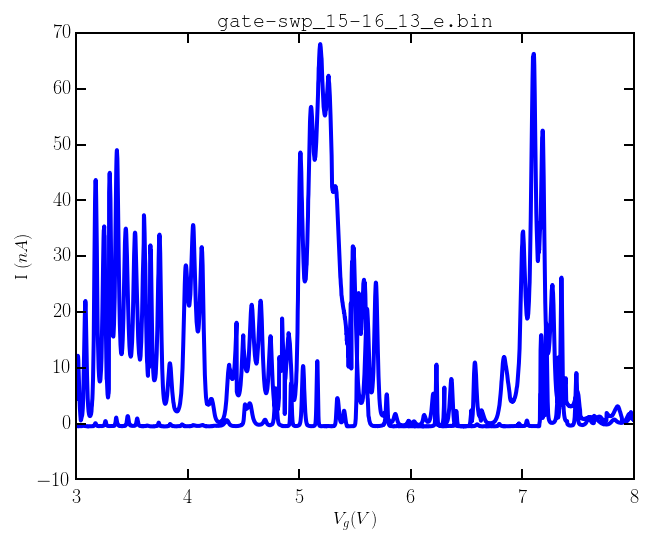

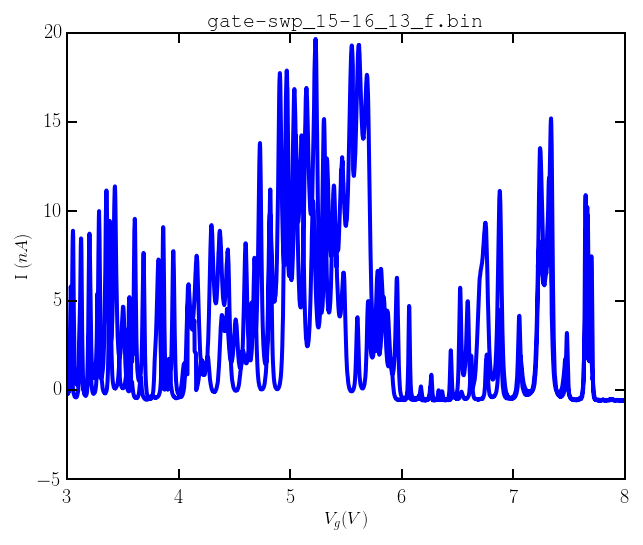

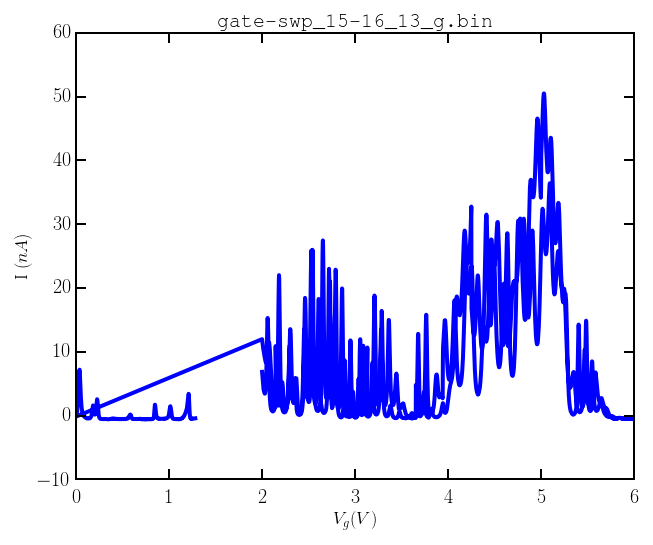

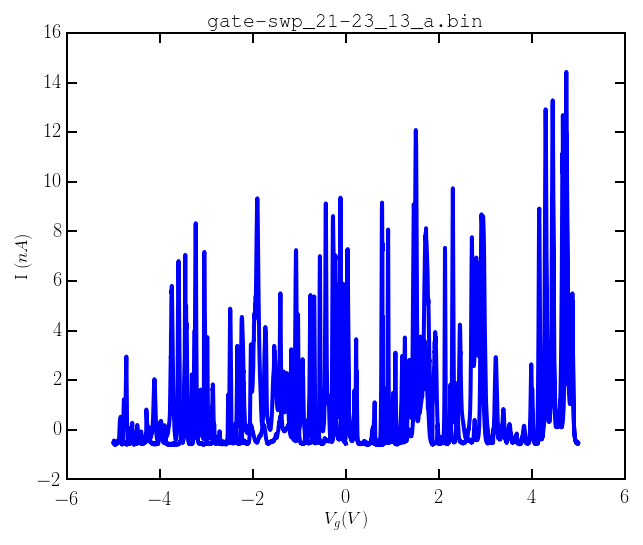

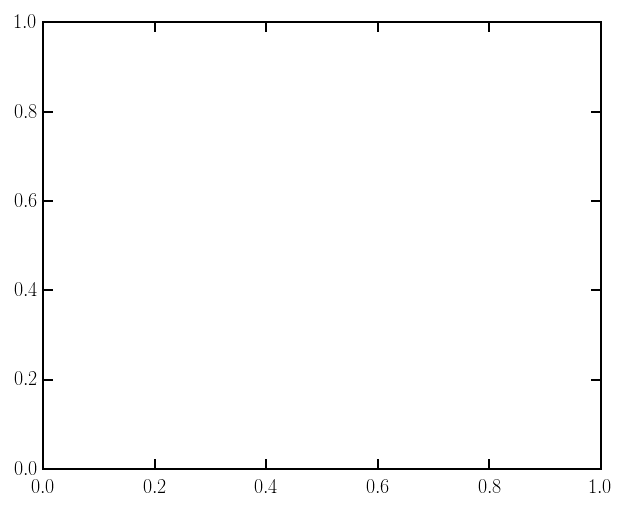

In [4]:
for f in flist:
    print f
    if os.path.isfile(f):
        try:
            print 'trying -- ', f
            df = lvdt.get_data_2d(f)

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(df['Gate'], df['Iavg']*1e9)
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'I $(nA)$')
        except ValueError, msg:
            print msg
        except KeyError, msg:
            print msg

### Bias/Gate Sweep

In [8]:
data_dir = '/Volumes/EDDropbox/Data/SCF75/4K/'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*VI-gate*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'VI-gate_15-16_13_d' 
1 -- 'VI-gate_15-16_13_e' 
2 -- 'VI-gate_21-23_13_a' 
3 -- 'VI-gate_21-23_13_b_n1T' 
4 -- 'VI-gate_21-23_13_b_p1T' 
5 -- 'VI-gate_15-16_13_b' 
6 -- 'VI-gate_15-16_13_a' 
7 -- 'VI-gate_15-16_13_c' 
8 -- 'VI-gate_15-16_13_f' 


index 0 is out of bounds for axis 0 with size 0


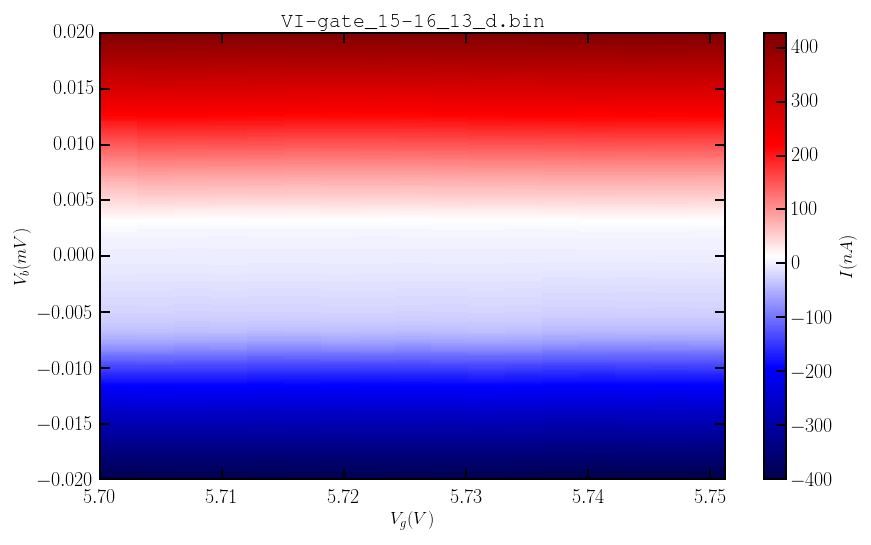

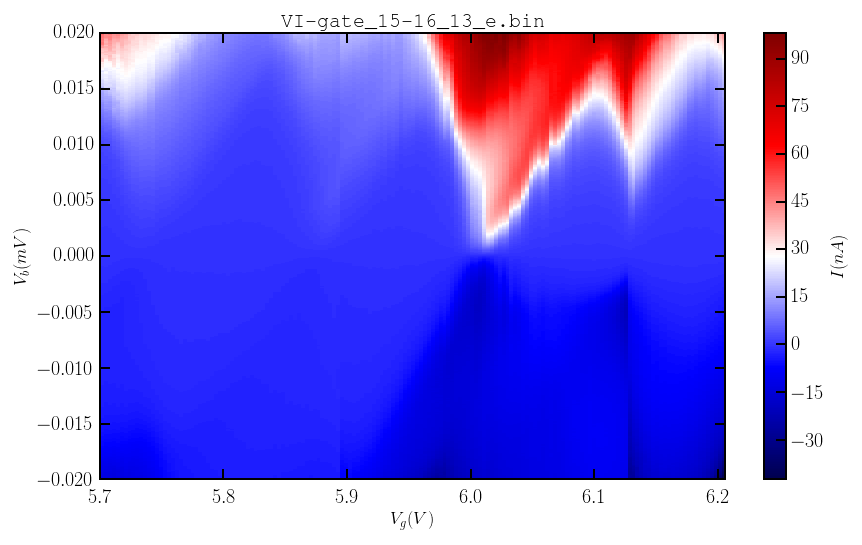

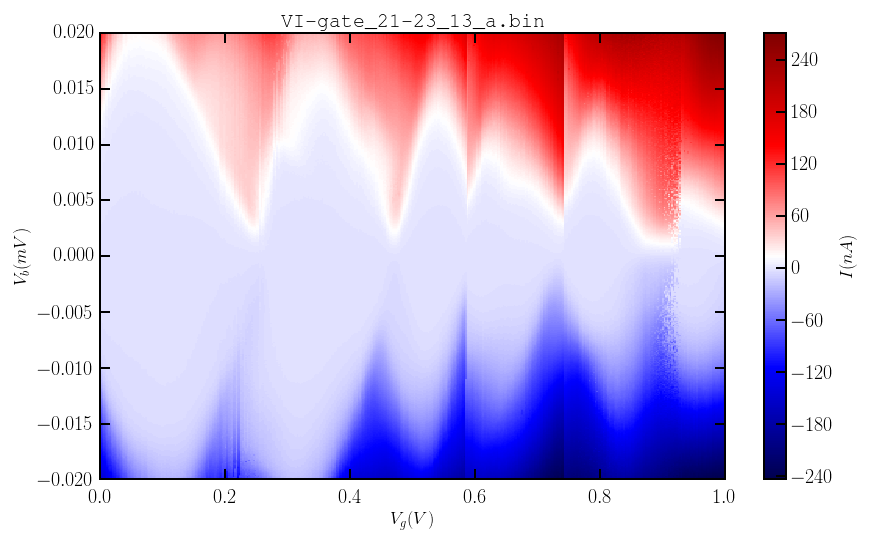

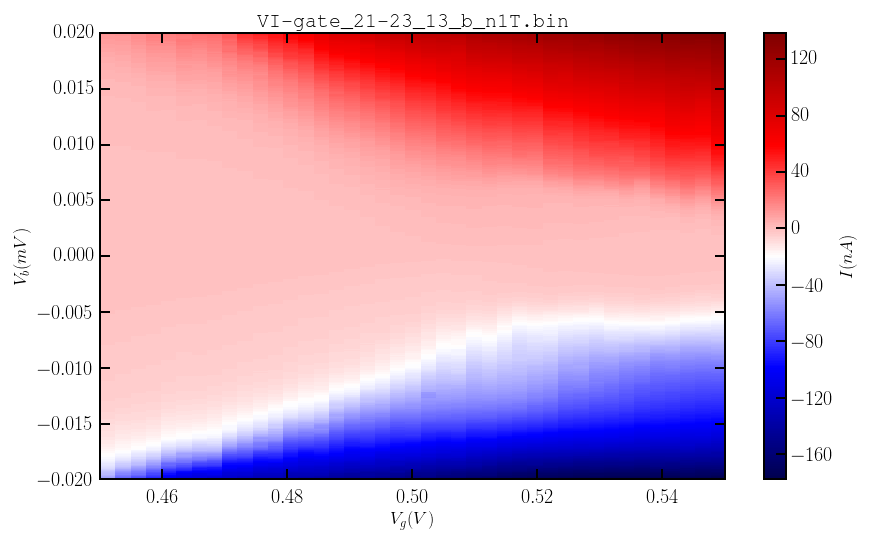

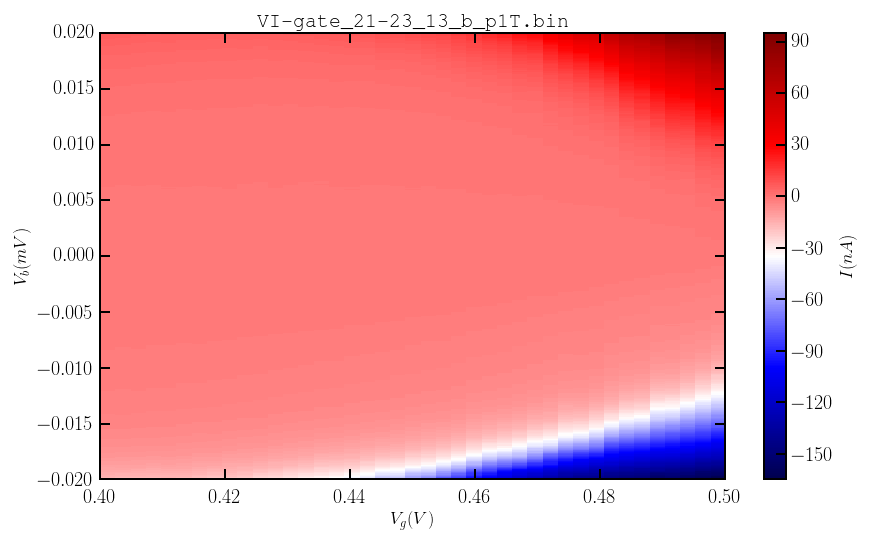

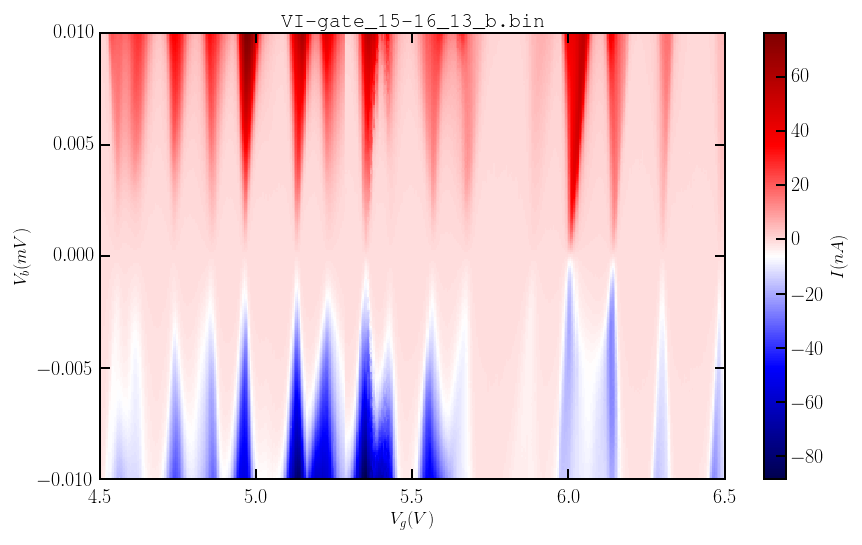

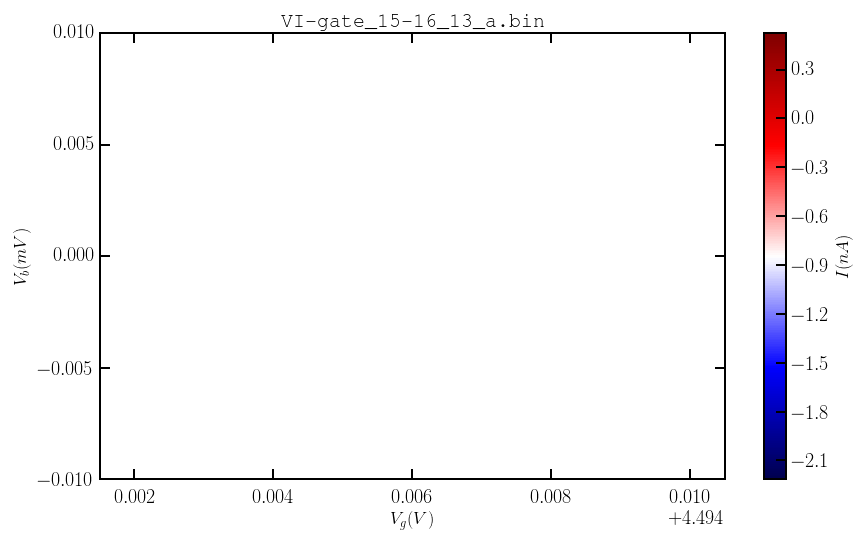

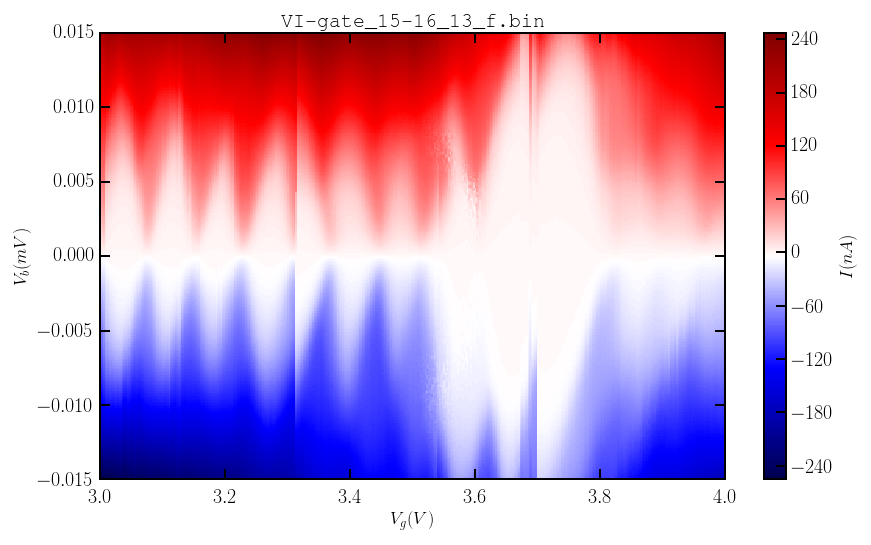

In [10]:
for f in flist:
    if os.path.isfile(f):
        try:
            df = lvdt.get_data_3d(f)
            df = df.groupby(df.index).mean()

            fig = plt.figure(figsize=(14,8))
            ax = fig.add_subplot(1,1,1)
            limits = lvdt.df_extent(df)
            im = ax.imshow(df*1e9, extent = limits, 
                           cmap = plt.cm.seismic,
                           origin = 'lower', aspect = 'auto', interpolation = 'nearest')
            ax.set_xlabel(r'$V_g (V)$')
            ax.set_ylabel(r'$V_b (mV)$')
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            cb = plt.colorbar(im)
            cb.set_label(r'$I (nA)$')
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg

### Field Sweep

In [11]:
data_dir = '/Volumes/EDDropbox/Data/SCF75/4K/'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*Bswp*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'Bswp_21-23_13_f' 
1 -- 'Bswp_21-23_13_e' 
2 -- 'VI-Bswp_15-16_13_a' 
3 -- 'Bswp_21-23_13_g' 
4 -- 'Bswp_21-23_13_b' 
5 -- 'Bswp_15-16_13_b' 
6 -- 'Bswp_21-23_13_d' 
7 -- 'Bswp_21-23_13_c' 
8 -- 'Bswp_21-23_13_a' 
9 -- 'Bswp_21-23_13_h' 
10 -- 'Bswp_15-16_13_a' 
11 -- 'VI-Bswp_15-16_13_b' 


index 0 is out of bounds for axis 0 with size 0
'Field'


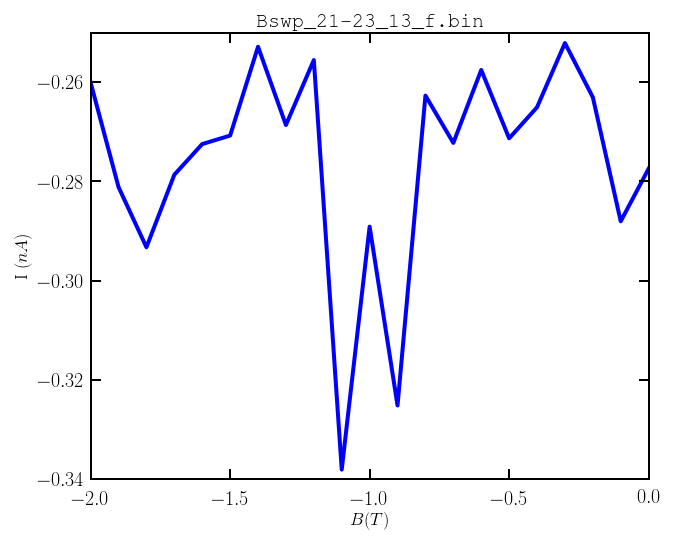

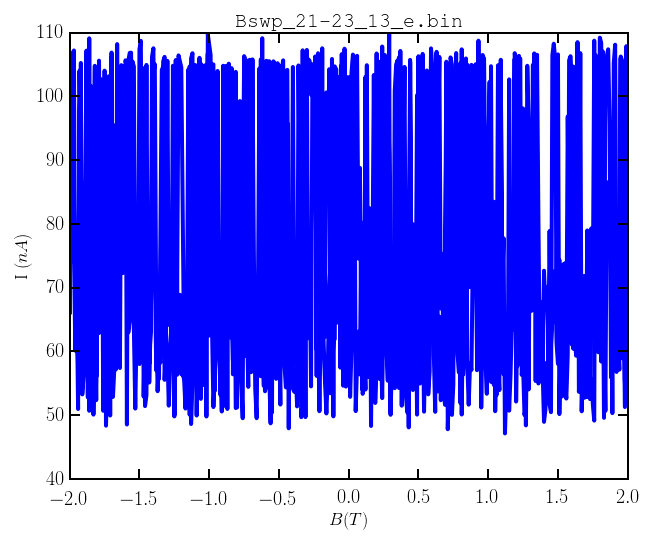

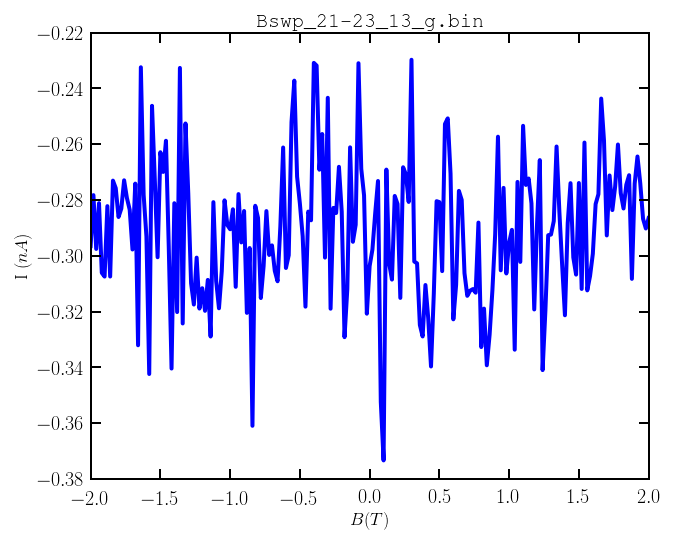

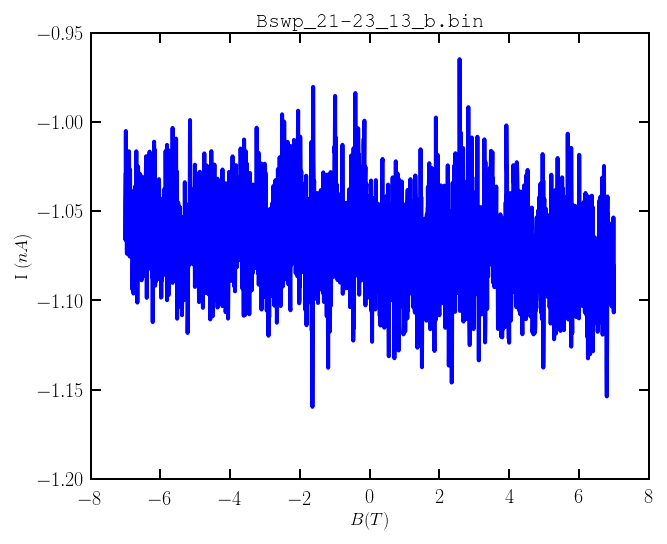

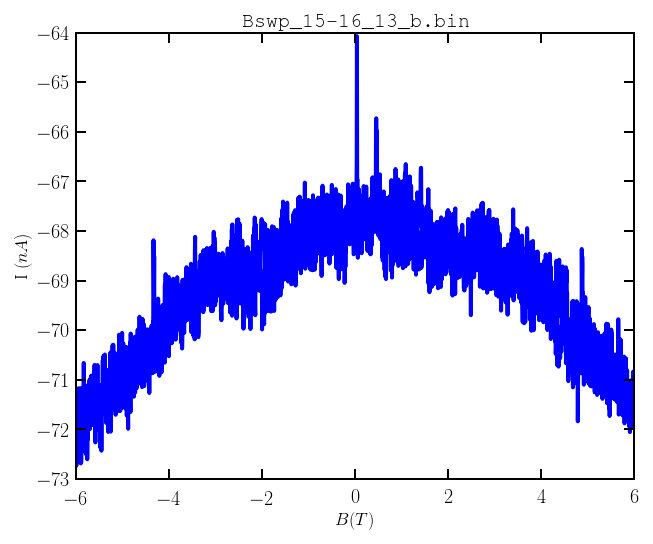

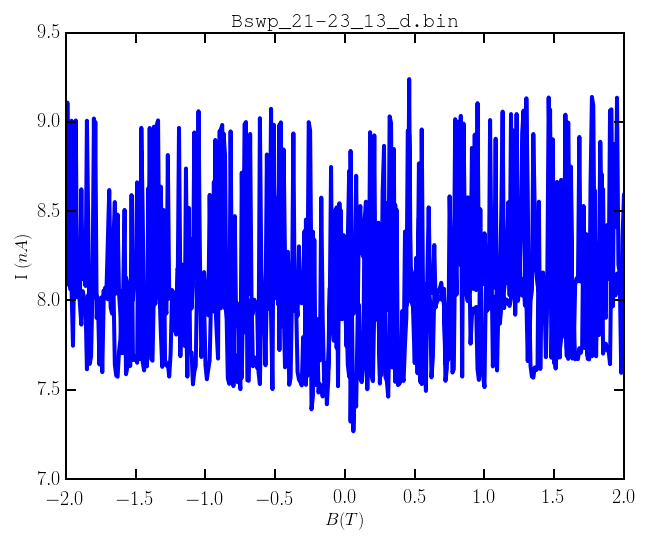

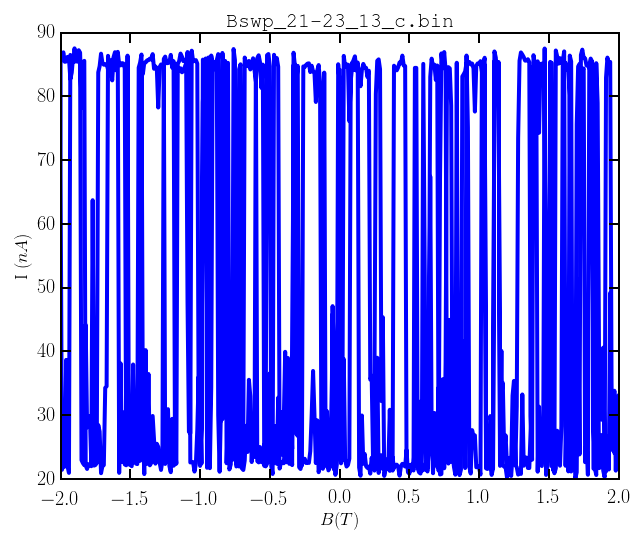

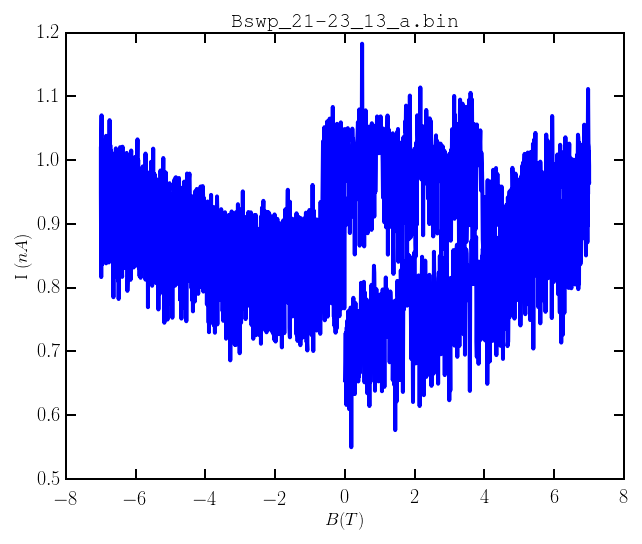

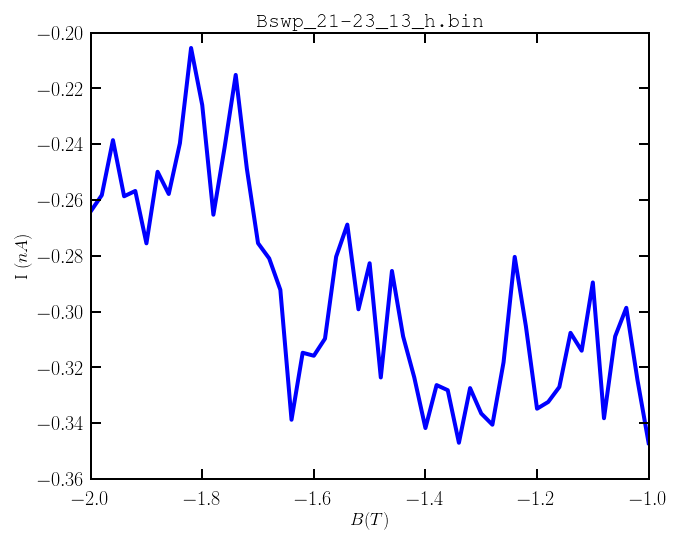

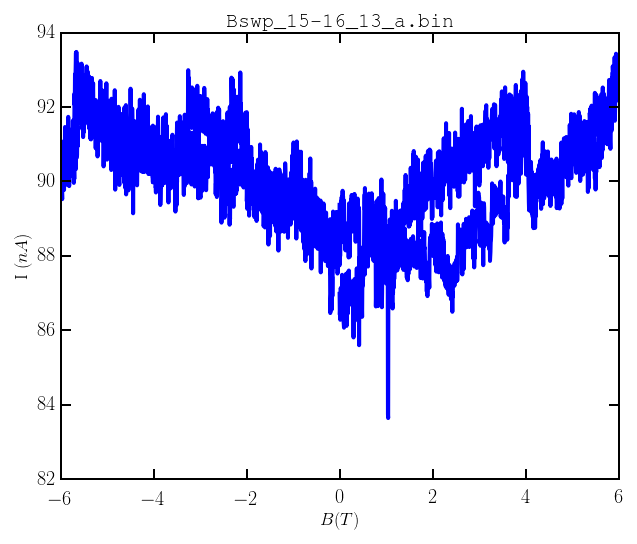

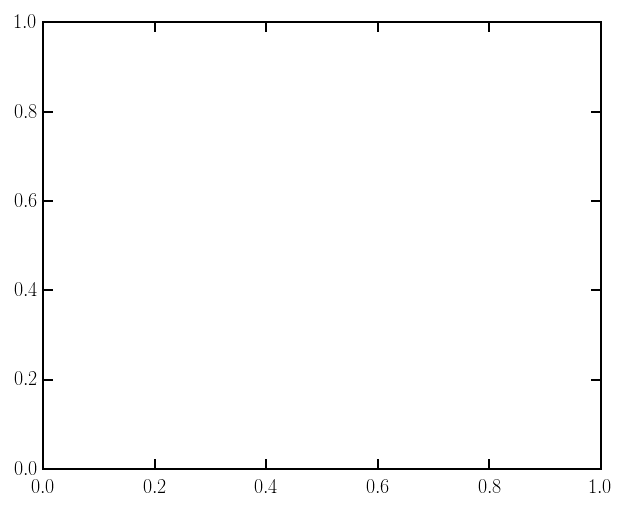

In [15]:
for f in flist:
    if os.path.isfile(f):
        try:
            df = lvdt.get_data_2d(f)

            fig = plt.figure()
            ax = fig.add_subplot(1,1,1)
            ax.plot(df['Field'], df['Iavg']*1e9)
            ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
            ax.set_xlabel(r'$B (T)$')
            ax.set_ylabel(r'I $(nA)$')
        except ValueError, msg:
            print msg
        except IndexError, msg:
            print msg
        except KeyError, msg:
            print msg

### Bias/Field Sweep

In [16]:
data_dir = '/Volumes/EDDropbox/Data/SCF75/4K/'
flist = []
for i, f in enumerate(glob.glob(os.path.join(data_dir, '*VI-Bswp*.txt'))):
    s = f.split('/')[-1][:-4]
    print '{0} -- \'{1}\' '.format(i, s)
    flist.append(os.path.join(data_dir, s+'.bin'))

0 -- 'VI-Bswp_15-16_13_a' 
1 -- 'VI-Bswp_15-16_13_b' 


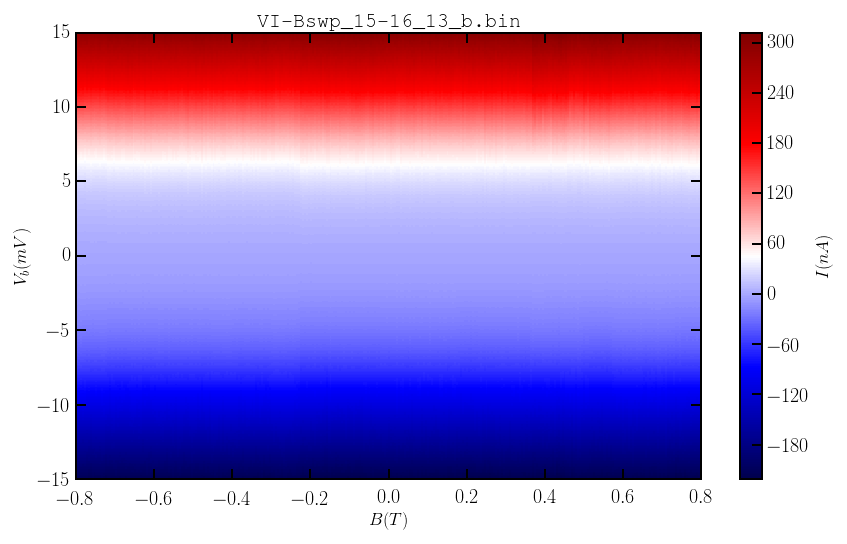

In [21]:
f = os.path.join(data_dir, 'VI-Bswp_15-16_13_b.bin') # only good one

df = lvdt.get_data_3d(f)
df = df.groupby(df.index).mean()
df.index = df.index*1000

fig = plt.figure(figsize=(14,8))
ax = fig.add_subplot(1,1,1)
limits = lvdt.df_extent(df)
im = ax.imshow(df*1e9, extent = limits, 
               cmap = plt.cm.seismic,
               origin = 'lower', aspect = 'auto', interpolation = 'nearest')
ax.set_xlabel(r'$B (T)$')
ax.set_ylabel(r'$V_b (mV)$')
ax.set_title(r'$\verb|{0}|$'.format(f.split('/')[-1]))
cb = plt.colorbar(im)
cb.set_label(r'$I (nA)$')